# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"


## Advanced Level Task

### TASK-8- Next Word Prediction :

### Dataset link : https://drive.google.com/file/d/1GeUzNVqiixXHnTl8oNiQ2W3CynX_lsu2/view

### Importing Libraries

In [8]:
#Importing packages
import numpy as np
np.random.seed(30)
import tensorflow as tf
tf.random.set_seed(30)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM, Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Dense, Activation, Dropout, RepeatVector
from tensorflow.keras.optimizers import  RMSprop
import matplotlib.pyplot as plt
import pickle
import heapq

### Loading the data

In [9]:
#Loading the data
path ='1661-0.txt'
text = open(path,encoding = "utf8").read().lower()
print('corpus length:', len(text))

corpus length: 581888


### Data Preprocessing

In [10]:
#Data Preprocessing
character = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(character))
indices_char = dict((i, c) for i, c in enumerate(character))
 
print(f'unique chars: {len(character)}')

unique chars: 73


In [11]:
#chunk 40 characters with 3 sequences
seq_len = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_len, step):
    sentences.append(text[i: i + seq_len ])
    next_chars.append(text[i + seq_len])
print(f'num training examples: {len(sentences)}')

num training examples: 193950


In [12]:
# generating our features and labels
#one hot encoding
X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
y = np.zeros((len(sentences), len(character)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

sentences[124]
next_chars[100]


<ipython-input-12-2f2383d5361d>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X = np.zeros((len(sentences), seq_len, len(character)), dtype=np.bool)
<ipython-input-12-2f2383d5361d>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = np.zeros((len(sentences), len(character)), dtype=np.bool)


'e'

In [13]:
#one hot encoded data
X[0][0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True])

In [14]:
#one hot encoded data
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [15]:
X.shape

(193950, 40, 73)

In [16]:
y.shape

(193950, 73)

### Creating the model

In [17]:
# Creating the model
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, len(character))))
model.add(Dense(len(character)))
model.add(Activation('softmax'))

### Model summary

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               103424    
                                                                 
 dense (Dense)               (None, 73)                9417      
                                                                 
 activation (Activation)     (None, 73)                0         
                                                                 
Total params: 112,841
Trainable params: 112,841
Non-trainable params: 0
_________________________________________________________________


### Training our model

In [19]:
# Training our model
optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(X, y,
                    validation_split=0.01, 
                    batch_size=128,
                    epochs=7, 
                    shuffle=True).history

Epoch 1/7
1501/1501 [==============================] - 18s 7ms/step - loss: 2.0371 - accuracy: 0.4033 - val_loss: 2.2340 - val_accuracy: 0.3876
Epoch 2/7
1501/1501 [==============================] - 8s 5ms/step - loss: 1.6639 - accuracy: 0.5029 - val_loss: 2.0719 - val_accuracy: 0.4263
Epoch 3/7
1501/1501 [==============================] - 9s 6ms/step - loss: 1.5445 - accuracy: 0.5343 - val_loss: 1.9604 - val_accuracy: 0.4588
Epoch 4/7
1501/1501 [==============================] - 8s 6ms/step - loss: 1.4805 - accuracy: 0.5526 - val_loss: 1.9104 - val_accuracy: 0.4655
Epoch 5/7
1501/1501 [==============================] - 8s 5ms/step - loss: 1.4385 - accuracy: 0.5632 - val_loss: 1.9028 - val_accuracy: 0.4809
Epoch 6/7
1501/1501 [==============================] - 9s 6ms/step - loss: 1.4085 - accuracy: 0.5702 - val_loss: 1.9026 - val_accuracy: 0.4918
Epoch 7/7
1501/1501 [==============================] - 9s 6ms/step - loss: 1.3867 - accuracy: 0.5758 - val_loss: 1.9218 - val_accuracy: 0.469

### saving our model

In [20]:
#saving our model
model.save('NW_keras_model.h5')
pickle.dump(history, open("history.p", "wb"))

### loading our model

In [21]:
#loading our model
model = load_model('NW_keras_model.h5')
history = pickle.load(open("history.p", "rb"))

### Model Evaluation 

In [22]:
#Model Evaluation
loss_and_acc=model.evaluate(X,y)
print("Test Loss", loss_and_acc[0])
print("Test Accuracy", loss_and_acc[1])

6061/6061 [==============================] - 25s 4ms/step - loss: 1.3410 - accuracy: 0.5880
Test Loss 1.3409823179244995
Test Accuracy 0.5880330204963684


### Plotting training and validation plots

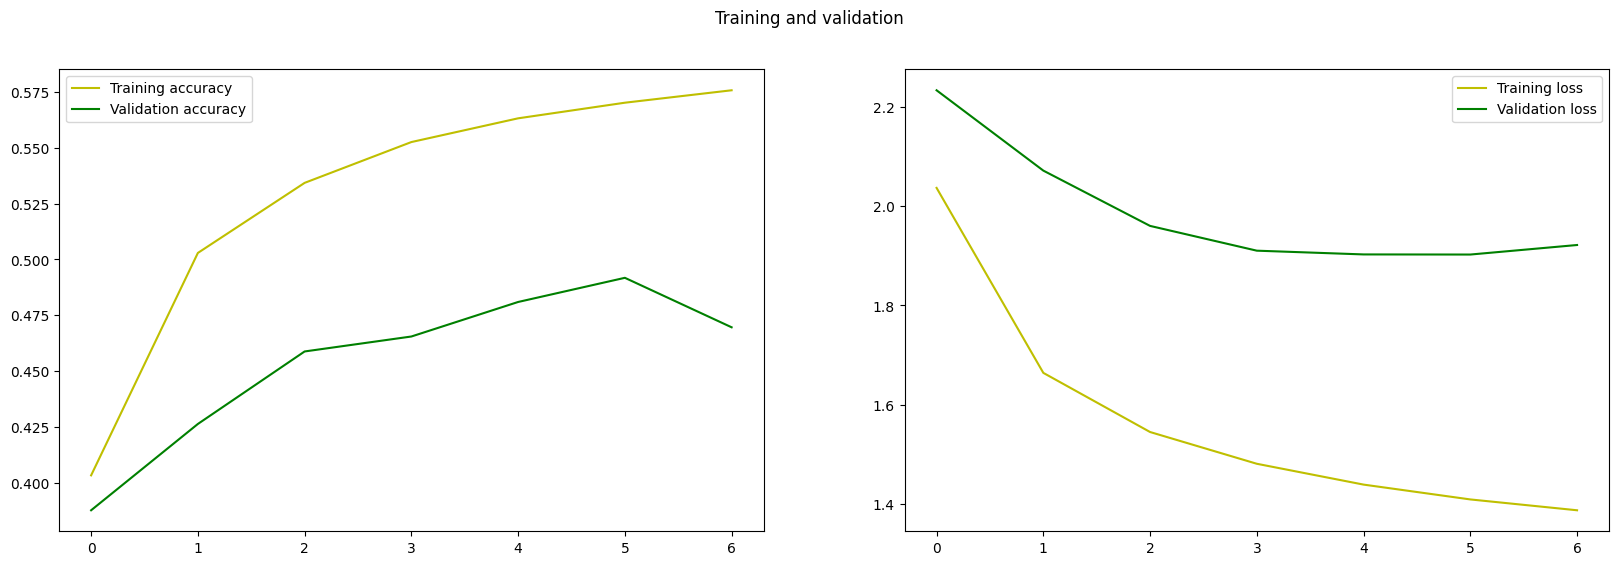

In [23]:
acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
ax[0].plot(epochs, acc, 'y', label='Training accuracy')
ax[0].plot(epochs, val_acc, 'g', label='Validation accuracy')
ax[0].legend(loc=0)
ax[1].plot(epochs, loss, 'y', label='Training loss')
ax[1].plot(epochs, val_loss, 'g', label='Validation loss')
ax[1].legend(loc=0)

plt.suptitle('Training and validation')
plt.show()

In [24]:
def prepare_input(text):
    x = np.zeros((1, seq_len, len(character)))
    for t, char in enumerate(text):
        x[0, t, char_indices[char]] = 1.
        
    return x

prepare_input("This is an example of input of our model".lower())

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [25]:
#functions to get next probable characters
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [26]:
def predict_completion(text):
    original_text = text
    generated = text
    completion = ''
    while True:
        x = prepare_input(text)
        preds = model.predict(x, verbose=0)[0]
        next_index = sample(preds, top_n=1)[0]
        next_char = indices_char[next_index]
        text = text[1:] + next_char
        completion += next_char
        
        if len(original_text + completion) + 2 > len(original_text) and next_char == ' ':
            return completion

In [27]:
def predict_completions(text, n=3):
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [indices_char[idx] + predict_completion(text[1:] + indices_char[idx]) for idx in next_indices]

In [30]:
#Prediction
quotes = [   
    
    "Data science involves extracting insights and knowledge from large and complex datasets.",
    "Big data analytics enables businesses to gain valuable insights and make data-driven decisions.",
    "Deep learning is subset of machine learning,which is essentially a neural network with three or more layers.",
    "Machine learning algorithms can be used to predict customer behavior based on historical data.",
    "Big data analytics enables businesses to gain valuable insights and make data-driven decisions."
    
]

In [31]:
for q in quotes:
    seq = q[:40].lower()
    print(seq)
    print(predict_completions(seq, 5))
    print()

data science involves extracting insight
[' and ', 'ened ', '\nand ', '. ', ', ']

big data analytics enables businesses to
[' the ', 'ld ', 'ok ', 'ng ', '\nthe ']

deep learning is subset of machine learn
['ed ', ' and ', 'ing ', '\nand ', '. ']

machine learning algorithms can be used 
['to ', 'at ', 'of ', 'in ', 'before ']

big data analytics enables businesses to
[' the ', 'ld ', 'ok ', 'ng ', '\nthe ']

